<head>
    <center><title>~ Praktizieren Sie deskriptive Statistik mit Daten-World Happiness Report ~</title></center>
</head>   

# Einleitung


- Was wir am Ende dieses Abschnitts zielen:
    - Wenn Sie als Datenanalyst die folgenden deskriptiven Statistiken sehen,
    - Sie sollten die folgenden Bilder und Annahmen in Ihrem Kopf haben.

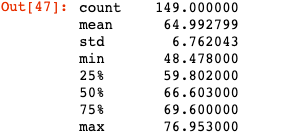

- Annahmen, die Sie treffen sollten:

    - Die Verteilung ist mäßig schief.
    - seine Schwänze sind kürzer und dünner, und oft ist sein zentraler Gipfel niedriger und breiter.
    - Linksschiefe Verteilung

- Graphen, die man sich ungefähr - nicht genau - vorstellen sollte:

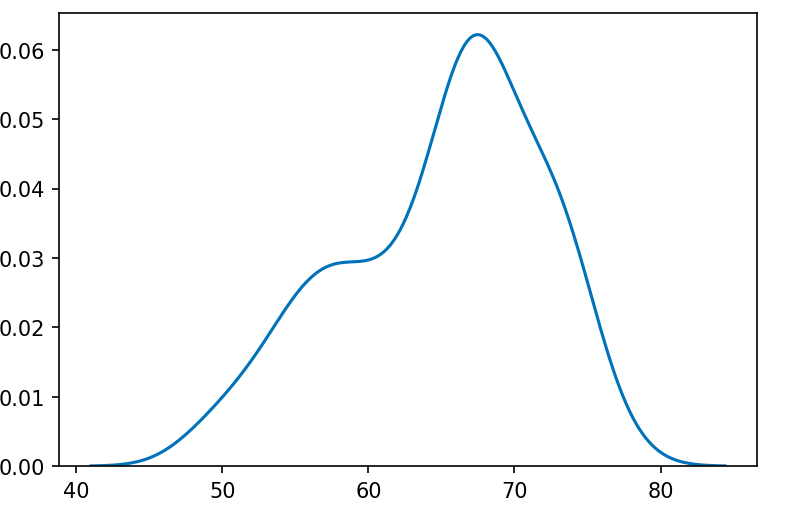

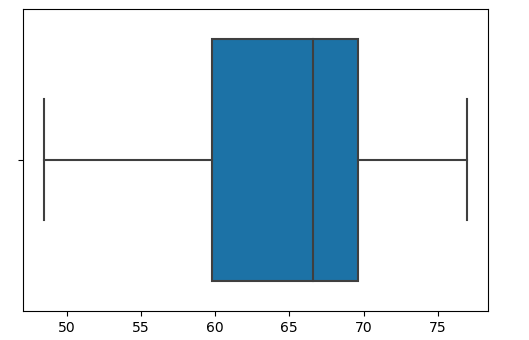

# Bibliotheken Importieren|Laden

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # Wir brauchen diese Bibliothek für -- (Modus, Skew, Kurtosis, iqr)

# Daten Laden

- Sie können die Original-CSV-Datei über den folgenden Link abrufen.
    - Datenquelle: http://worldhappiness.report/ed/2021/

- https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021

In [21]:
# !pip install lxml

In [4]:
# CODE HIER, um einen DataFrame aus der angegebenen CSV-Datei zu erstellen - "read_csv()"

happy_index = pd.read_csv('world-happiness-report-2021.csv')
happy_index

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [5]:
# CODE HIER um die Spalten zu sehen
happy_index.columns #df.keys()

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

- Erstellen Sie aus der angegebenen CSV-Datei einen neuen Datenrahmen, der die folgenden Spalten / Variablen enthalten sollte:

    - ``['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']``

In [7]:
# CODE HIER
hi = happy_index[['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
hi.columns


Index(['Country name', 'Regional indicator', 'Ladder score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

# Untersuchung von Daten | Erster Blick

- Abrufen grundlegender Informationen über DataFrame:
    - Head
    - Tail
    - Sample
    - Info
    - Describe
    - Len
    - Shape
    - Size
    - Columns
    - Index
    - Missing values
    - Duplicate values
    - Numerical columns
    - Categorical columns
    ...

In [20]:
# CODE HIER um HEAD of dataframe zu sehen
hi.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [21]:
# CODE HIER, um TAIL des Datenrahmens zu sehen
hi.tail()


,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924


In [22]:
# CODE HIER, um BEISPIELE aus dem Datenrahmen zu sehen
hi.sample(5)

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
58,Honduras,Latin America and Caribbean,5.919,8.648,0.812,67.300,0.857,0.081,0.809
101,Guinea,Sub-Saharan Africa,4.984,7.838,0.639,55.008,0.697,0.095,0.766
110,Iraq,Middle East and North Africa,4.854,9.240,0.746,60.583,0.630,-0.053,0.875
25,Saudi Arabia,Middle East and North Africa,6.494,10.743,0.891,66.603,0.877,-0.149,0.684
40,Panama,Latin America and Caribbean,6.180,10.350,0.896,69.652,0.872,-0.166,0.856


In [23]:
# CODE HIER um INFO des Datenrahmens zu sehen
hi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  149 non-null    object 
 1   Regional indicator            149 non-null    object 
 2   Ladder score                  149 non-null    float64
 3   Logged GDP per capita         149 non-null    float64
 4   Social support                149 non-null    float64
 5   Healthy life expectancy       149 non-null    float64
 6   Freedom to make life choices  149 non-null    float64
 7   Generosity                    149 non-null    float64
 8   Perceptions of corruption     149 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.6+ KB


In [67]:
# CODE HIER, um DESCRIPTIVE-Statistiken des Datenrahmens anzuzeigen
hi.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


In [25]:
# CODE HIER um die LÄNGE des Datenrahmens zu sehen
len(hi)

149

In [27]:
# CODE HERE to see SIZE of the dataframe
hi.size

1341

In [12]:
# CODE HIER um die GRÖSSE des Datenrahmens zu sehen


1341

In [29]:
# CODE HIER, um die FORM des Datenrahmens zu sehen
hi.shape

(149, 9)

In [30]:
# CODE HIER um SPALTEN des Datenrahmens zu sehen
hi.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [31]:
# CODE HIER um den INDEX des Datenrahmens zu sehen
hi.index

RangeIndex(start=0, stop=149, step=1)

In [33]:
hi.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [16]:
# CODE HIER, um zu sehen, ob im Datenrahmen ein MISSING VALUE vorhanden ist


Country name                    0
Regional indicator              0
Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [41]:
# CODE HIER, um zu sehen, ob es einen DOPPELTEN WERT im Datenrahmen gibt
hi.duplicated().sum()

0

In [52]:
hi.select_dtypes(include=['int64','float64']).columns # include number

Index(['Ladder score', 'Logged GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [18]:
# CODE HIER, um numerische SPALTEN im Datenrahmen zu sehen


Index(['Ladder score', 'Logged GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [66]:
hi.select_dtypes(exclude=['int64','float64']).columns # include object


Index(['Country name', 'Regional indicator'], dtype='object')

In [19]:
# CODE HIER, um kategorische SPALTEN im Datenrahmen zu sehen


Index(['Country name', 'Regional indicator'], dtype='object')

# Deskriptive Statistik des neuen Datenrahmens bereitstellen.

In [68]:
# CODE HIER, um DESCRIPTIVE-Statistiken des gesamten Datenrahmens anzuzeigen
hi.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


- Basic Score Explanations of the Variables:
    - **Ladder score**: Happiness score. 0 lowest, 10 maximum
    - **Social Support**: Perceived social support score 0 lowest, 10 maximum
    - **Freedom to make life choices**: Perceived freedom of expression 0 lowest, 10 maximum
    - **Perceptions of corruption**: Perceived corruption and kind of distrust in institutions 0 lowest, 10 maximum distrust

## Annahmen
-Ohne irgendwelche visuellen Darstellungen zu machen, treffen Sie bitte Annahmen, indem Sie sich die beschreibenden Informationen der Variablen selbst ansehen und Ihre Annahmen aufschreiben.

- Beschreibenden sie Ihre Anhamnen Hier:

    1-
    
    2-
    
    3-
    
- Begründen Sie Ihre Annahmen, indem Sie verschiedene Techniken anwenden, die während der Kurse besprochen und gelernt wurden.

    1-

    2-

    3-

## Deskriptive Statistik

- Spalte "Ladder Score"
    - Um die Konzepte im Detail zu lernen, konzentrieren wir uns zunächst nur auf die Variable „Ladder Score“.

In [21]:
# CODE HIER, um die deskriptive Statistik der Spalte "Ladder score" anzuzeigen


count    149.000000
mean       5.532839
std        1.073924
min        2.523000
25%        4.852000
50%        5.534000
75%        6.255000
max        7.842000
Name: Ladder score, dtype: float64

### Mittelwert & Mittlere(Median)

Faustregel:

- Wenn der Mittelwert größer als der Median ist, RECHTS schief (positiv).
- Wenn Mittelwert gleich Median ist, symmetrisch.
- Wenn der Median größer als der Mittelwert ist, schief nach LINKS (negativ).

Im Allgemeinen, wenn die Form ist

- Perfekt symmetrisch, der Mittelwert ist gleich dem Median.
- Rechtsschief, der Mittelwert ist größer als der Median.
- Linksschief, der Mittelwert ist kleiner als der Median.

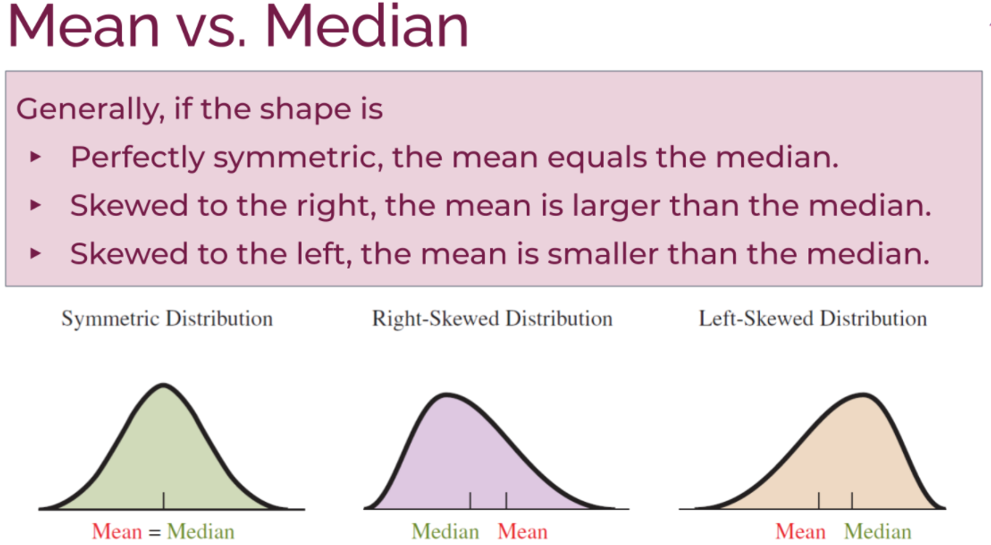

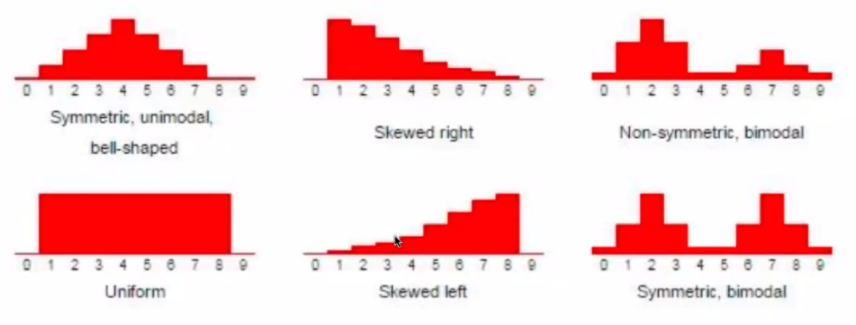

### Schiefe

- Faustregel:
    - Wenn die Schiefe kleiner als −1 oder größer als +1 ist, ist die Verteilung stark schief.
    - Wenn die Schiefe zwischen −1 und −½ oder zwischen +½ und +1 liegt, ist die Verteilung mäßig schief.
    - Wenn die Schiefe zwischen −½ und +½ liegt, ist die Verteilung annähernd symmetrisch.

- Referenz: https://brownmath.com/stat/shape.htm

In [22]:
# CODE HIER, um die Schiefe der Spalte „Ladder score“ zu finden und den Schiefewert auszuwerten


-0.10321590748801858

### Form - Kurtosis

- Faustregel:

    - Wenn die Kurtosis größer als 0 ist, sind ihre Enden im Vergleich zu einer normalen Verteilung länger und dicker, und oft ist ihre zentrale Spitze höher und schärfer.
    - Bei Normalverteilung ist Kurtosis = 0
    - Wenn die Kurtosis kleiner als 0 ist, sind ihre Enden im Vergleich zu einer normalen Verteilung kürzer und dünner, und oft ist ihre zentrale Spitze niedriger und breiter.

- Referenz: https://brownmath.com/stat/shape.htm

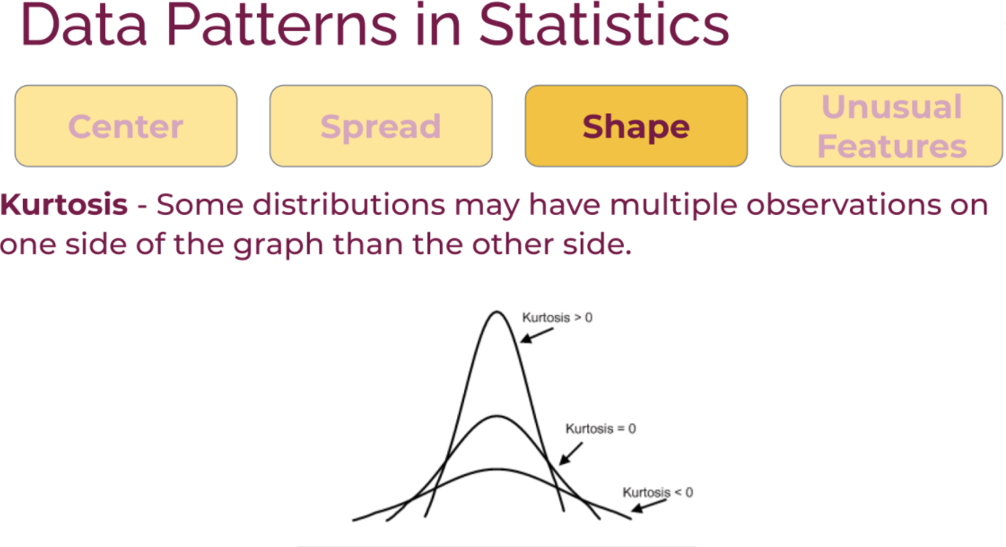

In [23]:
# CODE HIER, um die Kurtosis der Spalte „Ladder score“ zu finden und den Kurtosis-Wert auszuwerten


-0.39625143860400147

# Plots

###  Histogramm

<Figure size 2800x2400 with 0 Axes>

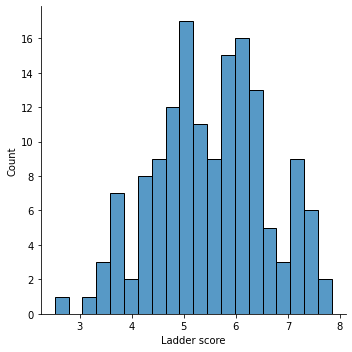

In [24]:
# CODE HIER, um das Histogramm der Spalte „Ladder score“ anzuzeigen
plt.figure(figsize = (14,12), dpi = 200)
sns.displot(x = 'Ladder score', data = df1_2021, bins = 20);

<Figure size 2800x2400 with 0 Axes>

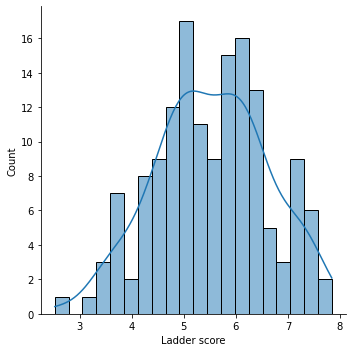

In [25]:
# CODE HIER, um das Histogramm der Spalte „Ladder score“ mit dem kde-Parameter anzuzeigen
plt.figure(figsize = (14,12), dpi = 200)
sns.displot(x = 'Ladder score', data = df1_2021, bins = 20, kde = True);

### KDE

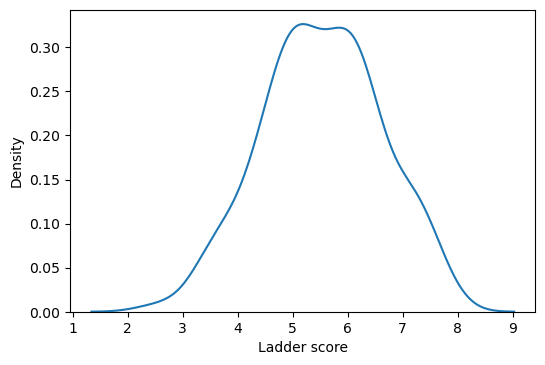

In [26]:
# CODE HIER, um den kdeplot der Spalte „Ladder score“ anzuzeigen.
plt.figure(figsize = (6,4), dpi = 100)
sns.kdeplot(x = 'Ladder score', data = df1_2021);

### ``.displot(..., kind="kde")``

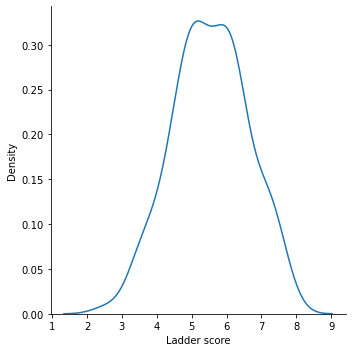

In [27]:
# CODE HIER, um den Distplot der Spalte „Ladder score“ mit dem kde-Parameter anzuzeigen
sns.displot(x = "Ladder score", data = df1_2021, kind = "kde");

- Notiz:
- Histogramme geben uns die Möglichkeit, numerische Variablen zu visualisieren. Aber denken Sie daran:
    - Histogramme identifizieren Ausreißer nicht statistisch wie Boxplots.
    - Die Interpretation der visuellen Darstellung hängt ausschließlich von der Sicht des Datenanalysten ab.

- Ein Kernel Density Estimate (KDE) Plot ist eine Methode zur Visualisierung der Verteilung von Beobachtungen in einem Datensatz, analog zu einem Histogramm.
- KDE stellt die Daten mithilfe einer kontinuierlichen Wahrscheinlichkeitsdichtekurve in einer oder mehreren Dimensionen dar.

### Streuung (Streuungsmaß) -- > Der Interquartilsabstand (IQR)

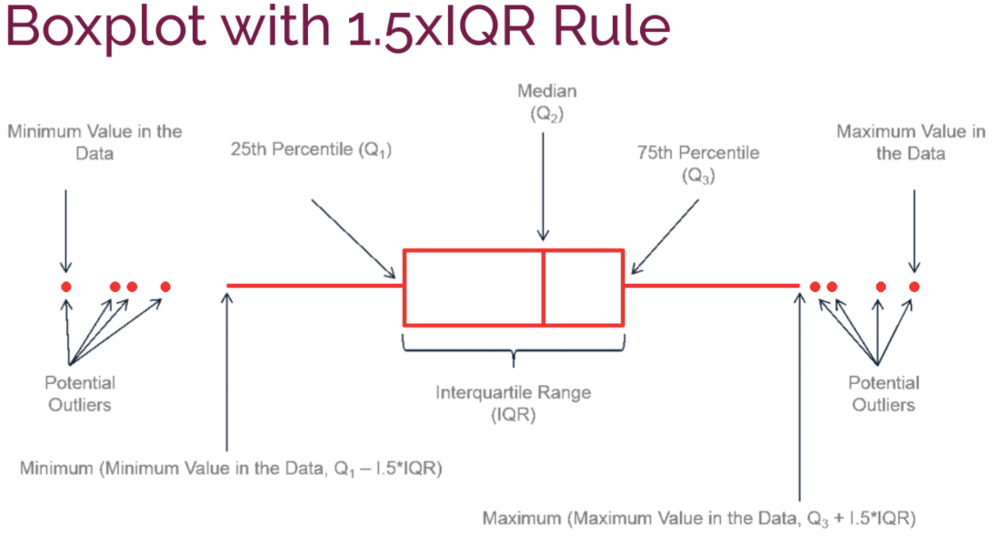

### Boxplot

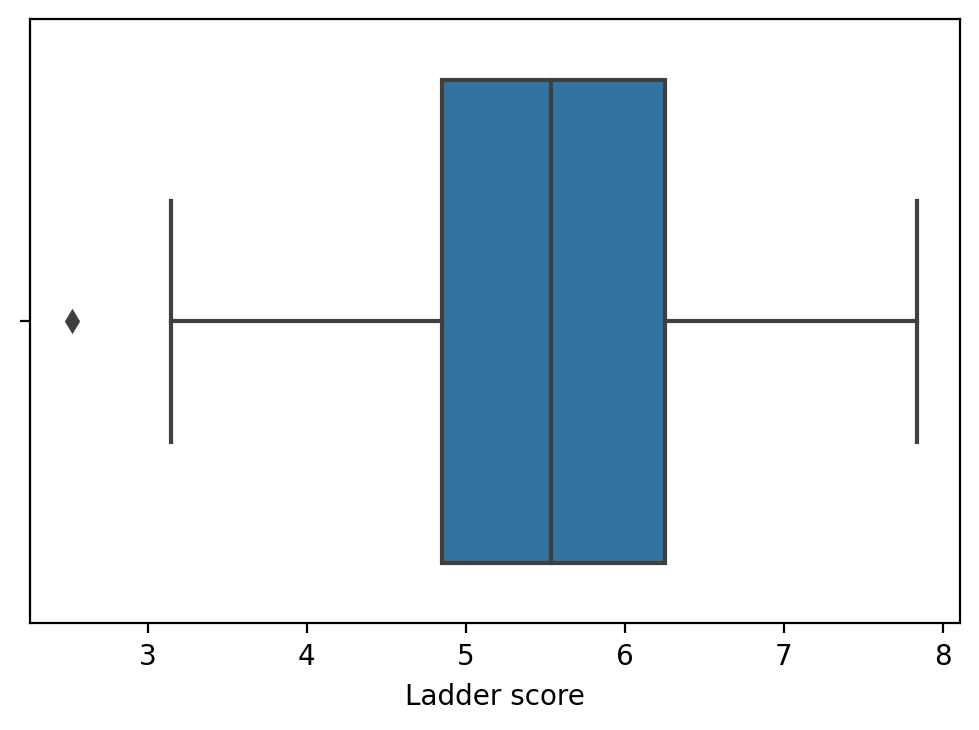

In [28]:
# CODE HIER, um den Boxplot der Spalte „Ladder score“ anzuzeigen
plt.figure(figsize = (6,4), dpi = 200)
sns.boxplot(x = 'Ladder score', data = df1_2021, orient = 'h');

count    149.000000
mean       5.532839
std        1.073924
min        2.523000
25%        4.852000
50%        5.534000
75%        6.255000
max        7.842000
Name: Ladder score, dtype: float64

Vergleichen und bewerten Sie die Zahlen aus der deskriptiven Statistik und den Boxplot-Werten

In [30]:
# CODE HIER, um Q1 und Q3 der Spalte „Ladder score“ zu finden


(4.852, 6.255)

In [31]:
# CODE HIER um den IQR manuell zu finden


1.4029999999999996

In [32]:
# CODE HIER, um den IQR mit Hilfe der Statistikbibliothek zu finden


1.4029999999999996

In [33]:
# CODE HIER, um den MINIMUM-Wert zu finden


2.747500000000001

Vergleichen und bewerten Sie das MINIMUM des Boxplots und das MINIMUM der Spalte „Ladder score“.

In [35]:
# CODE HIER, um den MAXIMAL-Wert zu finden


8.359499999999999

Vergleichen und bewerten Sie das MAXIMUM des Boxplots und das MAXIMUM der Spalte „Ladder score“.

In [37]:
# CODE HIER, um die POTENTIAL OUTLIERS zu finden


,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924


Wenn Sie während der Analyse die Ausreißer finden, ohne irgendetwas zu machen, machen Sie einfach eine Annahme, was passiert, wenn dieser Ausreißer nicht da wäre?

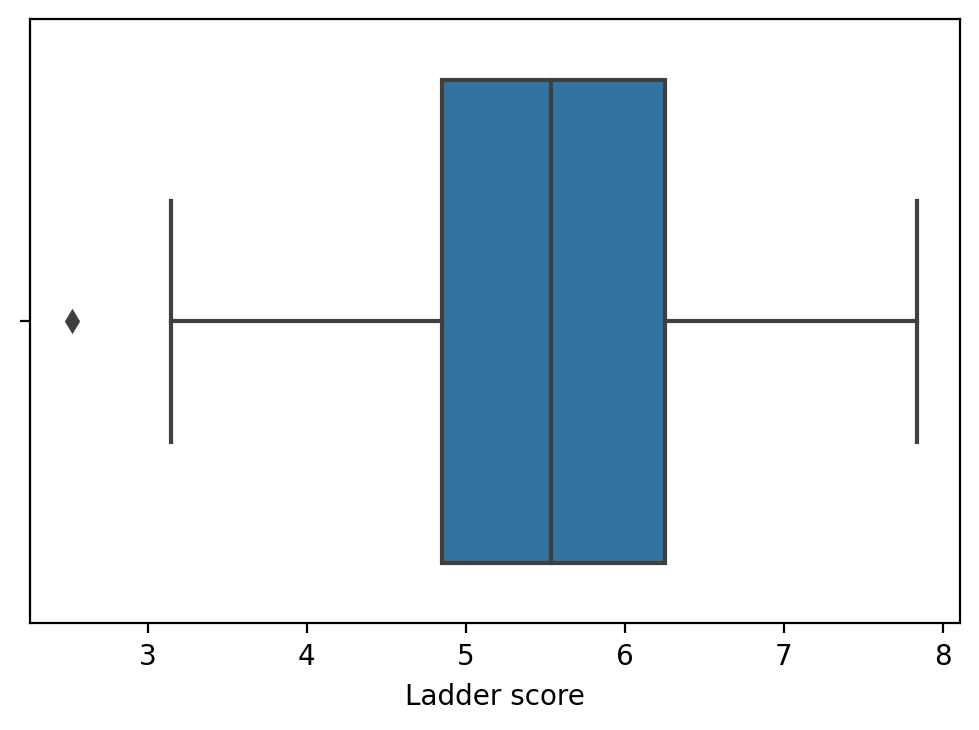

In [38]:
plt.figure(figsize = (6,4), dpi = 200)
sns.boxplot(x = 'Ladder score', data = df1_2021, orient = 'h');

- Make a copy of your data frame, and for the sake of the review, remove the outliers from your dataframe and make analysis and justify your assumptions. 

- By removing outliers from your dataframe what observations you observe? 


- Erstellen Sie eine Kopie Ihres Datenrahmens und entfernen Sie für die Überprüfung die Ausreißer aus Ihrem Datenrahmen, führen Sie eine Analyse durch und begründen Sie Ihre Annahmen.

- Welche Beobachtungen beobachten Sie, indem Sie Ausreißer aus Ihrem Datenrahmen entfernen?

In [39]:
# CODE HIER um den Datenrahmen ohne Ausreiser zu sehen


,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [40]:
# CODE HIER zum deskriptive Statistik mit Ausreiser


,count,mean,std,min,25%,50%,75%,max
Ladder score,149.0,5.532839,1.073924,2.523,4.852,5.534,6.255,7.842


In [41]:
# CODE HIER zum deskriptive Statistik ohne Ausreiser


,count,mean,std,min,25%,50%,75%,max
Ladder score,148.0,5.553176,1.048387,3.145,4.8535,5.535,6.2685,7.842


# Selbstarbeit - Zusatzliche Aufgabe

- Durch die Verwendung des folgenden Codes erhalten Sie "Ladder Score" Verteilungen über die "Regions": 
    - Treffen Sie Annahmen basierend auf Boxplot und 
    - Wählen Sie dann eine Region aus, um Ihre Annahme zur Verteilung der "Ladder Score" zu rechtfertigen.
    - Fühlen Sie sich frei, Ausreißer zu entfernen und die Auswirkungen auf die Gesamtanalyse zu sehen.

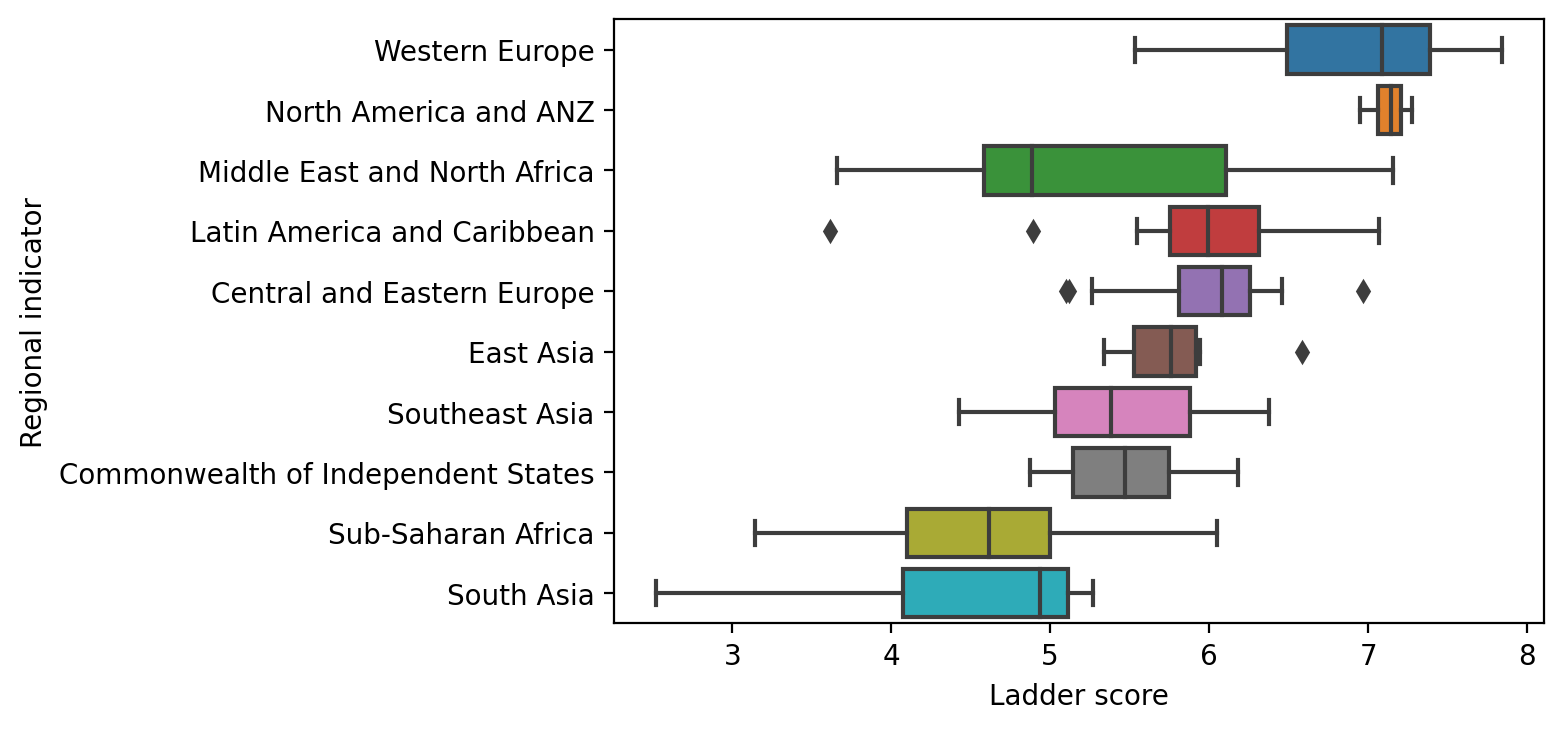

In [42]:
plt.figure(figsize = (6,4), dpi = 200)
sns.boxplot(x = "Ladder score", y = "Regional indicator", data = df1_2021);